## Part 1: Quick (and dirty) EDA

**TIP: Do this data exploration in a "scrap" file so you can explore quickly and messily.**

_We are going to use this dataset (`input_data2/housing_train.csv`) for the regression and ML assignments, as well as the prediction contest. The general focus will be on modelling the **Sale Price** (`v_SalePrice`)._

You should do the usual data exploration. 
- Sample basics: What is the unit of observation? What time spans are covered?
- Look for outliers, missing values, or data errors
- Note what variables are continuous or discrete numbers, which variables are categorical variables (and whether the categorical ordering is meaningful)     
- You should read up on what all the variables mean from the documentation in the data folder.
- Visually explore the relationship between `v_Sale_Price` and other variables.
  - For continuous variables - take note of whether the relationship seems linear or quadratic or polynomial
  - For categorical variables - maybe try a box plot for the various levels?
  - Take notes about what you find    

(Delete this cell that contains these instructions before submission, so that your submission starts with the "EDA" section below this.)      

## Part 1: EDA

_Insert cells as needed below to write a short EDA/data section that summarizes the data for someone who has never opened it before._ 
- Answer essential questions about the dataset (observation units, time period, sample size, many of the questions above) 
- Note any issues you have with the data (variable X has problem Y that needs to get addressed before using it in regressions or a prediction model because Z)
- Present any visual results you think are interesting or important

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols as sm_ols
import matplotlib.pyplot as plt
import pandas_datareader as pdr 

In [2]:
housing_train_csv = 'input_data2/housing_train.csv'
housing_train = pd.read_csv(housing_train_csv) 

In [3]:
housing_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1941 entries, 0 to 1940
Data columns (total 81 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   parcel             1941 non-null   object 
 1   v_MS_SubClass      1941 non-null   int64  
 2   v_MS_Zoning        1941 non-null   object 
 3   v_Lot_Frontage     1620 non-null   float64
 4   v_Lot_Area         1941 non-null   int64  
 5   v_Street           1941 non-null   object 
 6   v_Alley            136 non-null    object 
 7   v_Lot_Shape        1941 non-null   object 
 8   v_Land_Contour     1941 non-null   object 
 9   v_Utilities        1941 non-null   object 
 10  v_Lot_Config       1941 non-null   object 
 11  v_Land_Slope       1941 non-null   object 
 12  v_Neighborhood     1941 non-null   object 
 13  v_Condition_1      1941 non-null   object 
 14  v_Condition_2      1941 non-null   object 
 15  v_Bldg_Type        1941 non-null   object 
 16  v_House_Style      1941 

Observation Unit: In this assignment I observed parcels, unique pieces of property.
Time Period : January 2006 - December 2008
Sample Size: 1941
Potential Errors : Some variables are missing observations. 

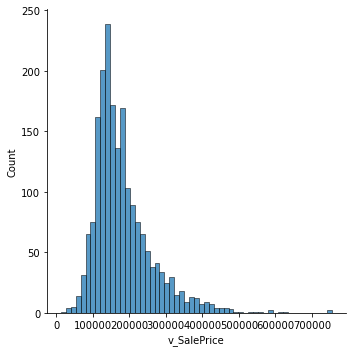

In [4]:
sns.displot(housing_train, x="v_SalePrice")

[Text(0.5, 1.0, 'Checking for outliers')]

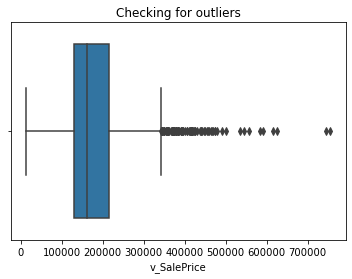

In [5]:
sns.boxplot(data=housing_train, 
            x='v_SalePrice').set(title='Checking for outliers')

## Part 2: Running Regressions

**Run these regressions on the RAW data, even if you found data issues that you think should be addressed.**

_Insert cells as needed below to run these regressions. Note that $i$ is indexing a given house, and $t$ indexes the year of sale._ 

1. $\text{Sale Price}_{i,t} = \alpha + \beta_1 * \text{v_Lot_Area}$

In [6]:
sm_ols('v_SalePrice ~ v_Lot_Area', data = housing_train).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            v_SalePrice   R-squared:                       0.067
Model:                            OLS   Adj. R-squared:                  0.066
Method:                 Least Squares   F-statistic:                     138.3
Date:                Sun, 03 Apr 2022   Prob (F-statistic):           6.82e-31
Time:                        17:52:11   Log-Likelihood:                -24610.
No. Observations:                1941   AIC:                         4.922e+04
Df Residuals:                    1939   BIC:                         4.924e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.548e+05   2911.591     53.163      0.000    1.49e+05     1.6e+05
v_Lot_Area     2.6489      0.225     11.760      0.000       2.207       3.091
==============================================================================
Omnibus:                      668.513   Durbin-Watson:                   1.064
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3001.894
Skew:                           1.595   Prob(JB):                         0.00
Kurtosis:                       8.191   Cond. No.                     2.13e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.13e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

2. $\text{Sale Price}_{i,t} = \alpha + \beta_1 * log(\text{v_Lot_Area})$

In [7]:
sm_ols('v_SalePrice ~ np.log(v_Lot_Area)', data = housing_train).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            v_SalePrice   R-squared:                       0.128
Model:                            OLS   Adj. R-squared:                  0.128
Method:                 Least Squares   F-statistic:                     285.6
Date:                Sun, 03 Apr 2022   Prob (F-statistic):           6.95e-60
Time:                        17:52:11   Log-Likelihood:                -24544.
No. Observations:                1941   AIC:                         4.909e+04
Df Residuals:                    1939   BIC:                         4.910e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          -3.279e+05   3.02e+04    -10.850      0.000   -3.87e+05   -2.69e+05
np.log(v_Lot_Area)  5.603e+04   3315.139     16.901      0.000    4.95e+04    6.25e+04
==============================================================================
Omnibus:                      650.067   Durbin-Watson:                   1.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2623.687
Skew:                           1.587   Prob(JB):                         0.00
Kurtosis:                       7.729   Cond. No.                         164.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

3. $log(\text{Sale Price}_{i,t}) = \alpha + \beta_1 * \text{v_Lot_Area}$

In [8]:
sm_ols('np.log(v_SalePrice) ~ v_Lot_Area', data = housing_train).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     np.log(v_SalePrice)   R-squared:                       0.065
Model:                             OLS   Adj. R-squared:                  0.064
Method:                  Least Squares   F-statistic:                     133.9
Date:                 Sun, 03 Apr 2022   Prob (F-statistic):           5.46e-30
Time:                         17:52:11   Log-Likelihood:                -927.19
No. Observations:                 1941   AIC:                             1858.
Df Residuals:                     1939   BIC:                             1870.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     11.8941      0.015    813.211      0.000      11.865      11.923
v_Lot_Area  1.309e-05   1.13e-06     11.571      0.000    1.09e-05    1.53e-05
==============================================================================
Omnibus:                       75.460   Durbin-Watson:                   0.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              218.556
Skew:                          -0.066   Prob(JB):                     3.48e-48
Kurtosis:                       4.639   Cond. No.                     2.13e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.13e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

4. $log(\text{Sale Price}_{i,t}) = \alpha + \beta_1 * log(\text{v_Lot_Area})$

In [9]:
sm_ols('np.log(v_SalePrice) ~ np.log(v_Lot_Area)', data = housing_train).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     np.log(v_SalePrice)   R-squared:                       0.135
Model:                             OLS   Adj. R-squared:                  0.135
Method:                  Least Squares   F-statistic:                     302.5
Date:                 Sun, 03 Apr 2022   Prob (F-statistic):           4.38e-63
Time:                         17:52:11   Log-Likelihood:                -851.27
No. Observations:                 1941   AIC:                             1707.
Df Residuals:                     1939   BIC:                             1718.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              9.4051      0.151     62.253      0.000       9.109       9.701
np.log(v_Lot_Area)     0.2883      0.017     17.394      0.000       0.256       0.321
==============================================================================
Omnibus:                       84.067   Durbin-Watson:                   0.955
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              255.283
Skew:                          -0.100   Prob(JB):                     3.68e-56
Kurtosis:                       4.765   Cond. No.                         164.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

5. $log(\text{Sale Price}_{i,t}) = \alpha + \beta_1 * \text{v_Yr_Sold}$

In [10]:
sm_ols('np.log(v_SalePrice) ~ v_Yr_Sold', data = housing_train).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     np.log(v_SalePrice)   R-squared:                       0.000
Model:                             OLS   Adj. R-squared:                 -0.000
Method:                  Least Squares   F-statistic:                    0.2003
Date:                 Sun, 03 Apr 2022   Prob (F-statistic):              0.655
Time:                         17:52:11   Log-Likelihood:                -991.88
No. Observations:                 1941   AIC:                             1988.
Df Residuals:                     1939   BIC:                             1999.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     22.2932     22.937      0.972      0.331     -22.690      67.277
v_Yr_Sold     -0.0051      0.011     -0.448      0.655      -0.028       0.017
==============================================================================
Omnibus:                       55.641   Durbin-Watson:                   0.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              131.833
Skew:                           0.075   Prob(JB):                     2.36e-29
Kurtosis:                       4.268   Cond. No.                     5.03e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.03e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

6. $log(\text{Sale Price}_{i,t}) = \alpha + \beta_1 * (\text{v_Yr_Sold==2007})+ \beta_2 * (\text{v_Yr_Sold==2008})$

In [11]:
sm_ols('np.log(v_SalePrice) ~ (v_Yr_Sold==2007)+(v_Yr_Sold==2008)', data = housing_train).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     np.log(v_SalePrice)   R-squared:                       0.001
Model:                             OLS   Adj. R-squared:                  0.000
Method:                  Least Squares   F-statistic:                     1.394
Date:                 Sun, 03 Apr 2022   Prob (F-statistic):              0.248
Time:                         17:52:11   Log-Likelihood:                -990.59
No. Observations:                 1941   AIC:                             1987.
Df Residuals:                     1938   BIC:                             2004.
Df Model:                            2                                         
Covariance Type:             nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    12.0229      0.016    745.087      0.000      11.991      12.055
v_Yr_Sold == 2007[T.True]     0.0256      0.022      1.150      0.250      -0.018       0.069
v_Yr_Sold == 2008[T.True]    -0.0103      0.023     -0.450      0.653      -0.055       0.035
==============================================================================
Omnibus:                       54.618   Durbin-Watson:                   0.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              127.342
Skew:                           0.080   Prob(JB):                     2.23e-28
Kurtosis:                       4.245   Cond. No.                         3.79
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

7. Choose your own adventure: Pick any five variables from the dataset that you think will generate good R2. Use them in a regression of $log(\text{Sale Price}_{i,t})$ 
    - Tip: You can transform/create these five variables however you want, even if it creates extra variables. For example: I'd count Model 6 above as only using one variable: `v_Yr_Sold`.
    - I got an R2 of 0.877 with just "5" variables. How close can you get? I won't be shocked if someone beats that!

In [12]:
sm_ols('np.log(v_SalePrice) ~ v_Yr_Sold+v_Overall_Qual+v_Overall_Cond+np.log(Q("v_Year_Remod/Add"))+v_Lot_Area', data = housing_train).fit().summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     np.log(v_SalePrice)   R-squared:                       0.736
Model:                             OLS   Adj. R-squared:                  0.735
Method:                  Least Squares   F-statistic:                     1079.
Date:                 Sun, 03 Apr 2022   Prob (F-statistic):               0.00
Time:                         17:52:11   Log-Likelihood:                 300.84
No. Observations:                 1941   AIC:                            -589.7
Df Residuals:                     1935   BIC:                            -556.3
Df Model:                            5                                         
Covariance Type:             nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                       -13.2747     12.315     -1.078      0.281     -37.427      10.878
v_Yr_Sold                        -0.0139      0.006     -2.357      0.019      -0.026      -0.002
v_Overall_Qual                    0.2048      0.004     49.730      0.000       0.197       0.213
v_Overall_Cond                    0.0089      0.004      2.025      0.043       0.000       0.018
np.log(Q("v_Year_Remod/Add"))     6.8310      0.543     12.573      0.000       5.765       7.897
v_Lot_Area                     9.719e-06   6.05e-07     16.073      0.000    8.53e-06    1.09e-05
==============================================================================
Omnibus:                      298.738   Durbin-Watson:                   1.666
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1221.881
Skew:                          -0.695   Prob(JB):                    4.70e-266
Kurtosis:                       6.630   Cond. No.                     3.41e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.41e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""


**Bonus formatting trick:** Instead of reporting all regressions separately, report all seven regressions in a _single_ table using `summary_col`.

In [13]:
mod_1=sm_ols('v_SalePrice ~ v_Lot_Area', data = housing_train).fit()
mod_2=sm_ols('v_SalePrice ~ np.log(v_Lot_Area)', data = housing_train).fit()
mod_3=sm_ols('np.log(v_SalePrice) ~ v_Lot_Area', data = housing_train).fit()
mod_4=sm_ols('np.log(v_SalePrice) ~ np.log(v_Lot_Area)', data = housing_train).fit()
mod_5=sm_ols('np.log(v_SalePrice) ~ v_Yr_Sold', data = housing_train).fit()
mod_6=sm_ols('np.log(v_SalePrice) ~ (v_Yr_Sold==2007)+(v_Yr_Sold==2008)', data = housing_train).fit()
mod_7=sm_ols('np.log(v_SalePrice) ~ v_Yr_Sold+v_Overall_Qual+v_Overall_Cond+np.log(Q("v_Year_Remod/Add"))+v_Lot_Area', data = housing_train).fit()

from statsmodels.iolib.summary2 import summary_col
print(summary_col(results=[mod_1,mod_2,mod_3,mod_4,mod_5,mod_6,mod_7],
                  float_format='%0.3f',
                  stars = True,
                  model_names=['Model 1','Model 2','Model 3','Model 4','Model 5','Model 6','Model 7']))
#summary_col(para)


                                 Model 1       Model 2      Model 3  Model 4  Model 5   Model 6  Model 7 
---------------------------------------------------------------------------------------------------------
Intercept                     154789.550*** -327915.802*** 11.894*** 9.405*** 22.293   12.023*** -13.275 
                              (2911.591)    (30221.347)    (0.015)   (0.151)  (22.937) (0.016)   (12.315)
R-squared                     0.067         0.128          0.065     0.135    0.000    0.001     0.736   
R-squared Adj.                0.066         0.128          0.064     0.135    -0.000   0.000     0.735   
np.log(Q("v_Year_Remod/Add"))                                                                    6.831***
                                                                                                 (0.543) 
np.log(v_Lot_Area)                          56028.170***             0.288***                            
                                            (

## Part 3: Regression interpretation

_Insert cells as needed below to answer these questions. Note that $i$ is indexing a given house, and $t$ indexes the year of sale._ 

1. If you didn't use the `summary_col` trick, list $\beta_1$ for Models 1-6 to make it easier on your graders.

Model 1: 2.649, Model 2: 56028.170, Model 3: 1.309e-05, Model 4: 0.2883, Model 5: -0.0051, Model 6: 0.0256

2. Interpret $\beta_1$ in Model 2. 

If v_Lot_Area increases by 1%, then v_SalePrice increases by about 560.28 units

3. Interpret $\beta_1$ in Model 3. 
    - HINT: You might need to print out more decimal places. Show at least 2 non-zero digits.
    
If v_Lot_Area increases 1 unit, then V_SalePrice increases by about 0.001309%.

4. Of models 1-4, which do you think best explains the data and why?

Model 4 best represents the data because it has the highest R2 value. 

5. Interpret $\beta_1$ In Model 5

If Log(v_SalePrice) increases by 1 unit, then v_Yr_Sold decreases by about 0.51%

6. Interpret $\alpha$ in Model 6

The average value of log(v_SalePrice) is 12.0229 for group 0 (because v_Yr_Sold_2007=v_Yr_Sold_2008=0 if v_Yr_Sold=0)

7. Interpret $\beta_1$ in Model 6

v_SalePrice is about 2.56% higher on average for cases when v_Yr_Sold=2008 than when v_Yr_Sold=2007.

8. Why is the R2 of Model 6 higher than the R2 of Model 5?

In both models X, v_Yr_Sold, is a categorical variable and in model 5 we only use the base value. In model 6 it is a better representation becasue it specifys the regression for year 2007 and 2008

9. What variables did you include in Model 7?

v_Yr_Sold, v_Overall_Qual, v_Overall_Cond, log(v_Year_Remod/Add), and v_Lot_Area

10. What is the R2 of your Model 7?

0.736

11. Speculate (not graded): Could you use the specification of Model 6 in a predictive regression? 

Yes, becasue the model does fit the data. Its R2 is 0.001, and as long as it is not 0 then you can use it in a predicitive regression. 

12. Speculate (not graded): Could you use the specification of Model 5 in a predictive regression? 

You cannot use this model in a predicitive regression because R2=0 which means it does not fit the data at all. 